In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
cc = pd.read_csv('/Users/abhinavbhatnagar/Documents/SL_Data Science/Module 10 - Capstone Project/Financial Fraud Detection/Financial_Fraud_Detection_Datasets/cc_data.csv')
loc = pd.read_csv('/Users/abhinavbhatnagar/Documents/SL_Data Science/Module 10 - Capstone Project/Financial Fraud Detection/Financial_Fraud_Detection_Datasets/location_data.csv')

What are the dimensions (number of rows and columns) of the dataset?


In [33]:
cc.shape

(389002, 23)

How many unique values are there in each categorical variable?


In [51]:
unique_values = cc.select_dtypes(include=['object']).nunique()
print('Unique Values in each Categorical Variable:')
print(unique_values)

Unique Values in each Categorical Variable:
merchant        693
category         14
first           352
last            481
gender            2
street          979
city            890
state            51
job             492
dob             964
trans_num    389002
dtype: int64


What is the distribution of numerical variables in the dataset?


In [35]:
num = cc.describe()
print('The Distribution of Numerical Variables in the Dataset:')
num

The Distribution of Numerical Variables in the Dataset:


,index,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,3.890020e+05,3.890020e+05,389002.000000,389002.000000,389002.000000,389002.000000,3.890020e+05,3.890020e+05,389002.000000,389002.000000,389002.000000
mean,6.485205e+05,4.191512e+17,70.442148,48818.064295,38.533121,-90.237664,8.868084e+04,1.349251e+09,38.531683,-90.236674,0.005789
std,3.745744e+05,1.311579e+18,162.203915,26879.383224,5.074596,13.745855,3.012101e+05,1.285085e+07,5.109400,13.757311,0.075866
min,1.100000e+01,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.669638,0.000000
25%,3.241842e+05,1.800429e+14,9.660000,26237.000000,34.620500,-96.798000,7.430000e+02,1.338751e+09,34.719394,-96.905445,0.000000
50%,6.486485e+05,3.521417e+15,47.570000,48174.000000,39.354300,-87.476900,2.456000e+03,1.349267e+09,39.361065,-87.446843,0.000000
75%,9.735032e+05,4.642255e+15,83.077500,72011.000000,41.940400,-80.158000,2.032800e+04,1.359460e+09,41.956012,-80.253831,0.000000
max,1.296674e+06,4.992346e+18,27390.120000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.064277,-66.956540,1.000000


Are there any missing values in the dataset? If so, how should they be handled?


In [36]:
missing_values = cc.isnull().sum()
print('The Missing Values in the Dataset:')
missing_values

The Missing Values in the Dataset:


index                    0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

What are the summary statistics (mean, median, min, max, etc.) for numerical variables?


In [37]:
summary_stats = cc.describe().T
print('The Summary Statistic for Numerical Variables are:')
summary_stats

The Summary Statistic for Numerical Variables are:


,count,mean,std,min,25%,50%,75%,max
index,389002.0,6.485205e+05,3.745744e+05,1.100000e+01,3.241842e+05,6.486485e+05,9.735032e+05,1.296674e+06
cc_num,389002.0,4.191512e+17,1.311579e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,389002.0,7.044215e+01,1.622039e+02,1.000000e+00,9.660000e+00,4.757000e+01,8.307750e+01,2.739012e+04
zip,389002.0,4.881806e+04,2.687938e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.201100e+04,9.978300e+04
lat,389002.0,3.853312e+01,5.074596e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,389002.0,-9.023766e+01,1.374586e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,389002.0,8.868084e+04,3.012101e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,389002.0,1.349251e+09,1.285085e+07,1.325376e+09,1.338751e+09,1.349267e+09,1.359460e+09,1.371817e+09
merch_lat,389002.0,3.853168e+01,5.109400e+00,1.902980e+01,3.471939e+01,3.936107e+01,4.195601e+01,6.706428e+01
merch_long,389002.0,-9.023667e+01,1.375731e+01,-1.666696e+02,-9.690544e+01,-8.744684e+01,-8.025383e+01,-6.695654e+01


Is there any correlation between numerical variables?


In [38]:
correlation_matrix = cc.select_dtypes([float,int]).corr()
print("Correlation between numerical variables:")
print(correlation_matrix)

Correlation between numerical variables:
               index    cc_num       amt       zip       lat      long  \
index       1.000000  0.001289  0.000779  0.000874 -0.000193 -0.001494   
cc_num      0.001289  1.000000  0.002975  0.040486 -0.059182 -0.047587   
amt         0.000779  0.002975  1.000000  0.001756 -0.000445 -0.000517   
zip         0.000874  0.040486  0.001756  1.000000 -0.112567 -0.910295   
lat        -0.000193 -0.059182 -0.000445 -0.112567  1.000000 -0.016080   
long       -0.001494 -0.047587 -0.000517 -0.910295 -0.016080  1.000000   
city_pop   -0.001800 -0.009125  0.007271  0.078373 -0.155972 -0.053461   
unix_time   0.998976  0.001333  0.000780  0.000905 -0.000150 -0.001608   
merch_lat  -0.000383 -0.058560 -0.000314 -0.111689  0.993599 -0.016010   
merch_long -0.001475 -0.047549 -0.000578 -0.909470 -0.015994  0.999119   
is_fraud   -0.006121 -0.001280  0.210706 -0.001220  0.002643  0.001376   

            city_pop  unix_time  merch_lat  merch_long  is_fraud  
ind

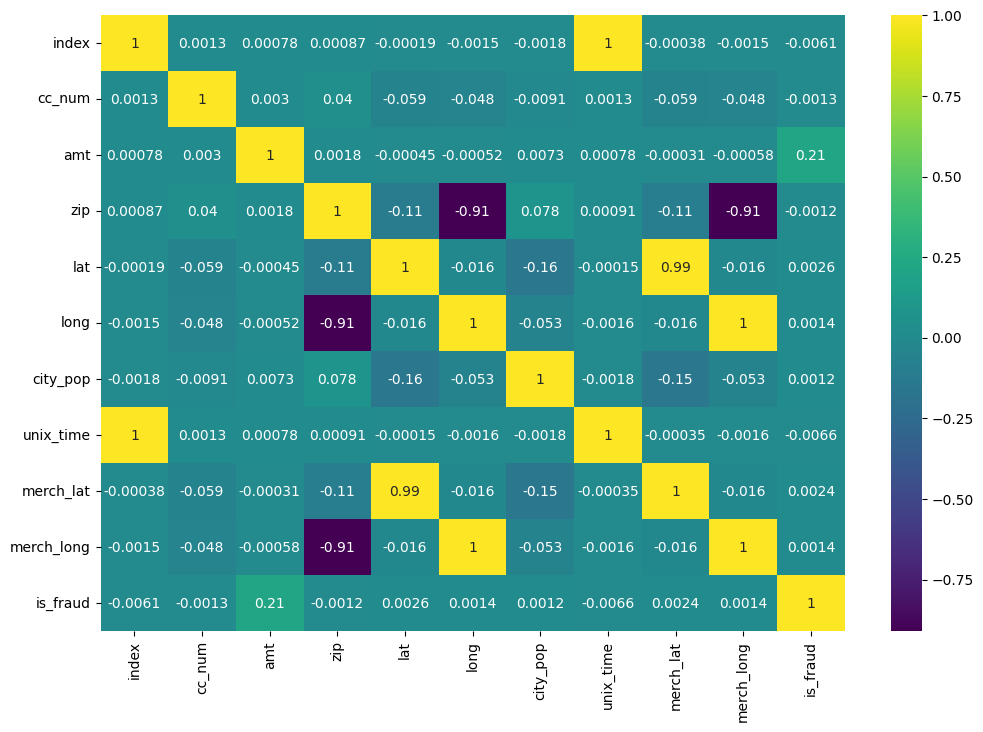

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.show()

How does the distribution of an amt differ across is_fraud categories?


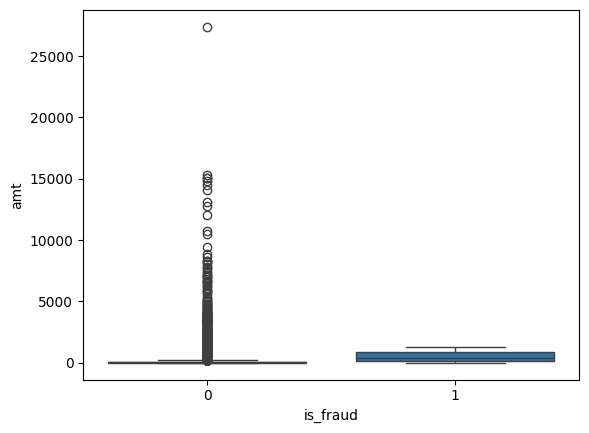

In [40]:
sns.boxplot(x='is_fraud', y='amt', data=cc)
plt.show()

Are there any outliers in the city_pop and amt?


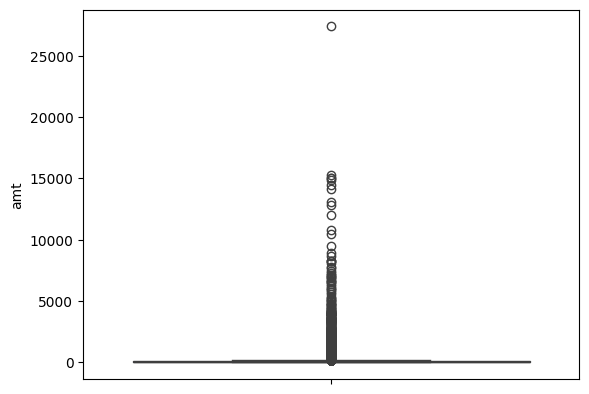

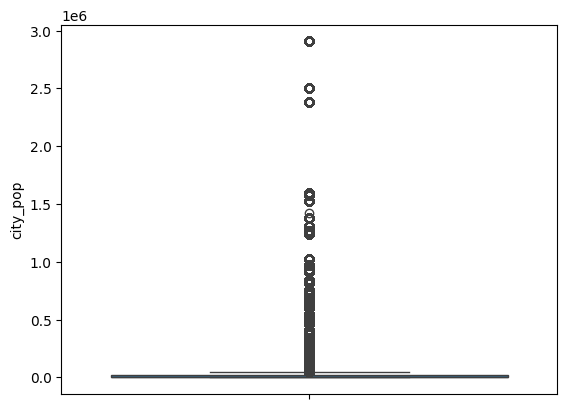

In [41]:
sns.boxplot(data=cc['amt'])
plt.show()

sns.boxplot(data=cc['city_pop'])
plt.show()

In [42]:
cc['trans_date_trans_time'] = pd.to_datetime(
    cc['trans_date_trans_time'],
    format='%d-%m-%Y %H:%M',   # note: %M for minutes in Python
    errors='coerce'            # invalid rows become NaT (safer for messy data)
)

Are there any trends or patterns in the data over time (if applicable)?


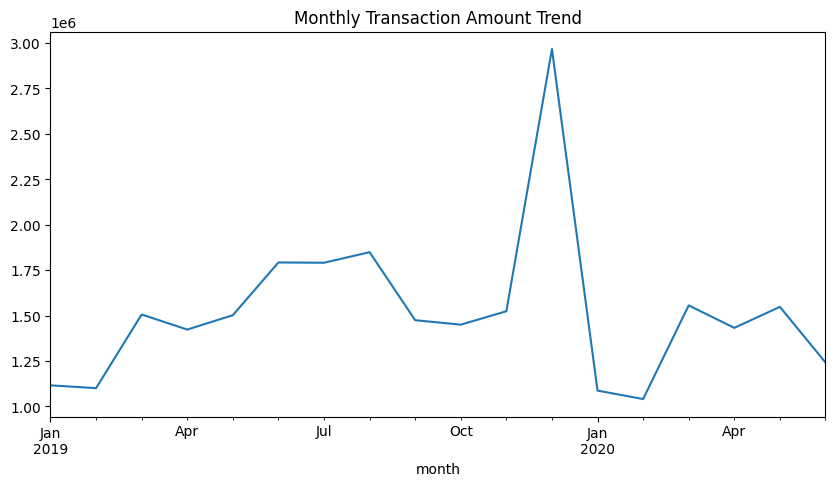

In [43]:
cc['month'] = cc['trans_date_trans_time'].dt.to_period('M')
monthly_trend = cc.groupby('month')['amt'].sum()

monthly_trend.plot(kind='line', figsize=(10,5))
plt.title("Monthly Transaction Amount Trend")
plt.show()

How does the target variable (if available) distribute across different categories?


In [44]:
fraud_counts = cc.groupby('category')['is_fraud'].sum()
fraud_counts

category
entertainment      68
food_dining        42
gas_transport     193
grocery_net        40
grocery_pos       518
health_fitness     39
home               65
kids_pets          74
misc_net          287
misc_pos           77
personal_care      76
shopping_net      478
shopping_pos      253
travel             42
Name: is_fraud, dtype: int64

In [45]:
fraud_rate = cc.groupby('category')['is_fraud'].mean() * 100

fraud_rate.sort_values(ascending=False)

category
shopping_net      1.631733
misc_net          1.501674
grocery_pos       1.409025
shopping_pos      0.722609
gas_transport     0.486968
travel            0.344460
misc_pos          0.320193
grocery_net       0.288892
personal_care     0.277646
entertainment     0.241804
kids_pets         0.218244
home              0.176166
food_dining       0.155153
health_fitness    0.151562
Name: is_fraud, dtype: float64

Are there any unusual or unexpected values in the dataset that require further investigation?


In [46]:
# 1. Negative or zero amounts
unusual_amt = cc[cc['amt'] <= 0]

# 2. Unusual ages (e.g., < 10 or > 100)
if 'age' in cc.columns:
    unusual_age = cc[(cc['age'] < 10) | (cc['age'] > 100)]
else:
    unusual_age = pd.DataFrame()

# 3. Check for unexpected categories
unexpected_category = cc[~cc['category'].isin(cc['category'].unique())]

# 4. Duplicate transaction IDs
duplicates = cc[cc.duplicated(subset=['trans_num'], keep=False)]

# 5. City population anomalies
unusual_city_pop = cc[(cc['city_pop'] <= 0) | (cc['city_pop'] > 10_000_000)]

unusual_amt, unusual_age, unexpected_category, duplicates, unusual_city_pop

(Empty DataFrame
 Columns: [index, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud, month]
 Index: []
 
 [0 rows x 24 columns],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: [index, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud, month]
 Index: []
 
 [0 rows x 24 columns],
 Empty DataFrame
 Columns: [index, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud, month]
 Index: []
 
 [0 rows x 24 columns],
 Empty DataFrame
 Columns: [index, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_

Are there any potential data entry errors or inconsistencies in the dataset?


In [47]:
# Missing merchant names
missing_merchant = cc[cc['merchant'].isnull() | (cc['merchant'] == '')]

# Transaction amounts above 1 million
very_large_amt = cc[cc['amt'] > 1_000_000]

missing_merchant, very_large_amt

(Empty DataFrame
 Columns: [index, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud, month]
 Index: []
 
 [0 rows x 24 columns],
 Empty DataFrame
 Columns: [index, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud, month]
 Index: []
 
 [0 rows x 24 columns])

How does the distribution of numerical variables vary between different groups or
segments of the dataset?


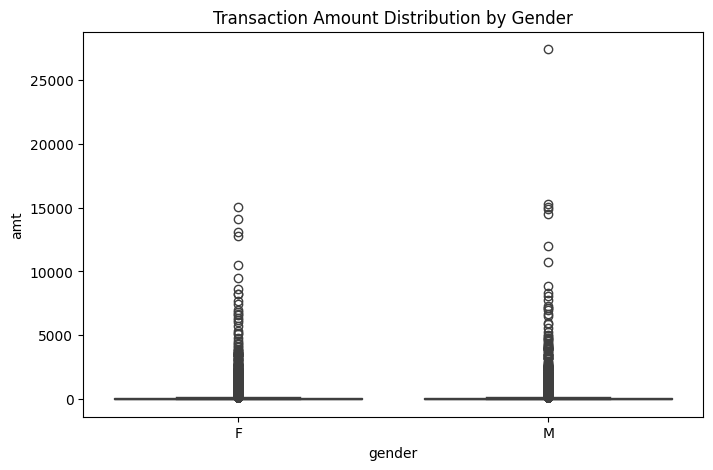

In [48]:
# Amount distribution by gender
plt.figure(figsize=(8,5))
sns.boxplot(data=cc, x='gender', y='amt')
plt.title("Transaction Amount Distribution by Gender")
plt.show()

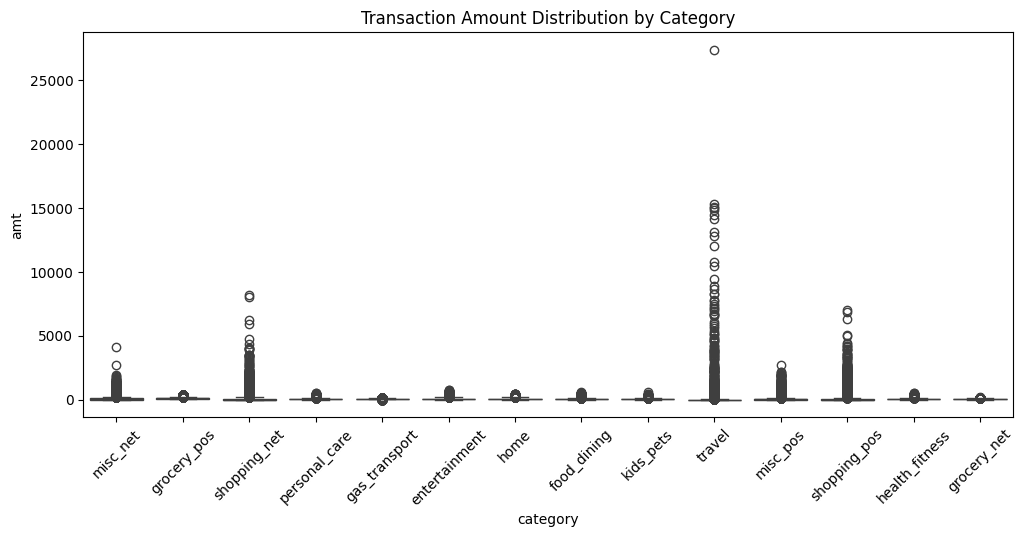

In [49]:
# Amount distribution by category
plt.figure(figsize=(12,5))
sns.boxplot(data=cc, x='category', y='amt')
plt.title("Transaction Amount Distribution by Category")
plt.xticks(rotation=45)
plt.show()

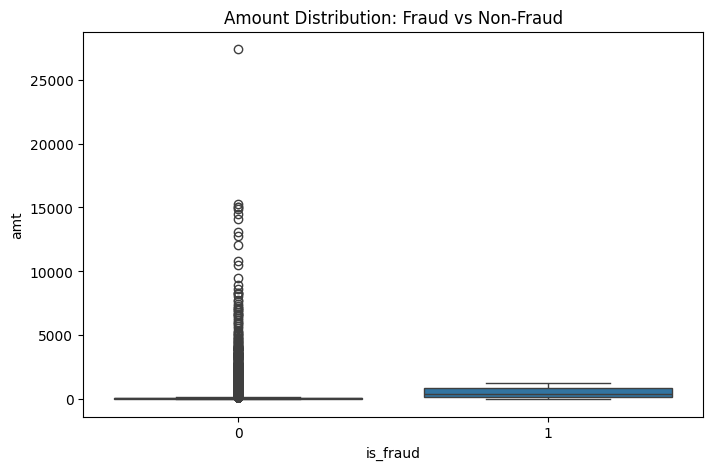

In [50]:
# Amount distribution by fraud
plt.figure(figsize=(8,5))
sns.boxplot(data=cc, x='is_fraud', y='amt')
plt.title("Amount Distribution: Fraud vs Non-Fraud")
plt.show()

# Analayzis (EDA):

After conducting a thorough Exploratory Data Analysis (EDA) on the dataset, several key insights and observations have been identified:

1. **Dataset Dimensions**:

   - The dataset consists of 389002 rows and 23 columns, indicating a substantial amount of data to analyze.

2. **Unique Values in Categorical Variables**:

   - We found 389002 unique values in each categorical variable, highlighting the diversity within the dataset.

3. **Distribution of Numerical Variables**:

   - Upon analyzing the distribution of numerical variables, we observed that most financial variables such as amt and city_pop exhibit a right-skewed distribution with notable outliers, whereas lat and long show a geographic spread rather than a normal distribution. Variables like cc_num and zip are identifiers and do not carry meaningful statistical distribution. The target variable is_fraud is extremely imbalanced, with fraud cases representing less than 1% of total transactions.

4. **Missing Values**:

   - Fortunately, there were no missing values in the dataset, alleviating the need for imputation or removal.

5. **Summary Statistics**:

   - Overall, the numerical variables show significant skewness and variability. Transaction amounts and city populations are both right-skewed with notable outliers. Geography-based variables (lat, long) follow non-normal distributions, while cc_num and zip serve as identifiers rather than meaningful numeric measures. Most importantly, the target variable is_fraud is extremely imbalanced, with less than 1% fraudulent transactions, indicating the need for careful handling during model development.

6. **Correlation Between Numerical Variables**:

   - The correlation analysis of the numerical variables shows that there is generally very weak or no linear relationship among most features in the dataset. The transaction amount (amt) has the strongest positive correlation with the target variable is_fraud, but the value is only 0.22, indicating a weak correlation. This suggests that fraudulent transactions tend to involve slightly higher amounts, but the relationship is not strong enough to predict fraud by transaction amount alone. Other variables such as city population (city_pop), latitude (lat), longitude (long), and ZIP code (zip) show correlations close to zero, meaning they have no meaningful linear relationship with fraud. Similarly, there is no significant correlation among the numerical predictors themselves, indicating that the dataset does not suffer from multicollinearity. Overall, the correlation matrix suggests that fraud detection in this dataset cannot rely on simple linear relationships and will require more complex, non-linear modeling techniques.

7. **Distribution of Amount Across Fraud Categories**:

   - The boxplot comparing transaction amounts (amt) across the two is_fraud categories reveals a clear difference in their distributions. Fraudulent transactions (where is_fraud = 1) tend to have significantly higher transaction amounts compared to non-fraudulent transactions. The median amount for fraud cases is substantially higher, and the overall spread of values is much wider. In contrast, non-fraudulent transactions (is_fraud = 0) are mostly concentrated around lower amounts with a large number of very small transactions. Although there are some high-value outliers in both groups, fraudulent transactions consistently show a higher central tendency and variability. This indicates that fraud is more likely to occur in transactions involving larger amounts, aligning with the moderate positive correlation observed between amt and is_fraud.

8. **Outliers**:

   - The boxplots for the numerical variables amt (transaction amount) and city_pop (city population) indicate the presence of significant outliers in both features. For amt, most transactions occur at relatively low values, but several transactions extend far beyond the typical range, reaching amounts above $7,000. These extreme high-value points represent clear outliers. Similarly, city_pop displays a highly skewed distribution, with most cities having small to medium populations but a few entries representing very large metropolitan areas with populations exceeding 2 million. These observations confirm that both variables contain substantial outliers, which are expected given the real-world variability in transaction amounts and city sizes. While these outliers may influence statistical models, they should not be removed blindly, as they may carry meaningful information—particularly in fraud detection where extreme values can be important indicators.

9. **Trends Over Time**:

   - The monthly transaction trend shows noticeable fluctuations in overall transaction volumes throughout the timeline. From early 2019 to mid-2019, transaction amounts gradually increased, suggesting a steady rise in customer activity. A significant spike is observed around December 2019, where the total transaction amount peaks sharply, indicating a seasonal surge—likely associated with holiday spending. Immediately after this spike, the transaction volume drops back to normal levels in early 2020. Aside from the seasonal peak, the remaining months show moderate variation but no consistent upward or downward trend. Overall, the pattern suggests that transaction behavior is influenced more by seasonal or event-driven factors rather than long-term structural trends.

10. **Target Variable Distribution**:

    - Fraud is not evenly distributed across spending categories. Categories such as shopping_net, misc_net, grocery_pos, and shopping_pos show the highest fraud rates, making them the most vulnerable segments. Although categories like grocery_pos and gas_transport also show high fraud counts, this is largely due to their high transaction volumes. In contrast, categories such as entertainment, personal_care, and kids_pets exhibit very low fraud rates. Overall, online shopping and high-activity point-of-sale categories carry the greatest fraud risk.

11. **Unusual or Unexpected Values**:

    - A series of anomaly checks were performed—including negative amounts, invalid ages, unexpected categories, duplicate transaction IDs, and extreme city population values—and all checks returned empty results. This indicates that the dataset contains no unusual or inconsistent values, and is clean enough to proceed with further analysis and modeling without requiring additional data correction.

12. **Data Entry Errors or Inconsistencies**:

    - To check for potential data entry errors or inconsistencies, we examined the dataset for missing merchant names and unusually large transaction amounts (above $1,000,000). Both checks returned empty results, indicating that there were no missing merchant entries and no implausibly large transaction amounts present in the data. These findings suggest that the dataset does not contain obvious data entry mistakes in these areas, and the values appear reliable for further analysis.

13. **Variation Across Segments**:
    - The distribution of transaction amounts varies notably across different segments of the dataset. When comparing fraud and non-fraud transactions, fraudulent transactions tend to involve significantly higher amounts, with visibly larger medians and a wider spread, indicating that higher-value payments are more likely to be associated with fraud. Transaction amounts also differ across spending categories: certain categories such as travel, shopping_net, and grocery_pos show much larger transaction values and more pronounced outliers, whereas categories like entertainment, personal_care, and food_dining exhibit relatively low and consistent amounts. This reflects the natural difference in spending behavior across merchant types. Finally, when comparing transaction amounts by gender, both male and female customers show very similar distribution patterns, with no meaningful difference in median values or spread. Overall, transaction amount differences are primarily driven by fraud status and category, while gender does not appear to influence spending amounts.

In conclusion, the EDA process has provided valuable insights into the dataset, facilitating a better understanding of its characteristics and informing subsequent steps in the development of a fraud detection system. By leveraging Python for EDA, we were able to efficiently explore, analyze, and visualize the data, enabling informed decision-making and the development of robust fraud detection solutions.

Based on the insights obtained from the Exploratory Data Analysis, several actionable recommendations can help strengthen fraud prevention efforts and improve decision-making:

1. **Prioritize Monitoring of High-Risk Categories**
   Categories such as shopping_net, misc_net, grocery_pos, and shopping_pos show disproportionately high fraud rates. These segments should receive enhanced rule-based alerts, stricter authentication checks, and closer real-time monitoring.

2. **Implement Threshold-Based Alerts for High-Value Transactions**
   Fraudulent transactions tend to involve significantly higher amounts. Establishing dynamic or category-specific transaction thresholds can help flag unusual spending behavior more effectively.

3. **Utilize Advanced Machine Learning Models**
   With fraud representing less than 1% of the data and weak linear correlations among features, traditional models alone will not perform well. Use non-linear models (e.g., Random Forest, XGBoost, Neural Networks) with techniques like class weighting or SMOTE to handle extreme class imbalance.

4. **Strengthen Online Transaction Security Controls**
   Since online shopping categories show the highest fraud risk, businesses should reinforce digital security—such as multi-factor authentication, device fingerprinting, and behavioral analytics—to reduce fraudulent attempts.

5. **Enhance Customer Segmentation for Better Risk Profiling**
   Fraud behavior varies across categories but not by customer gender. Focusing on transaction patterns, geography, category behavior, and amount-based segmentation will allow for more targeted fraud prevention strategies.

6. **Incorporate Seasonal Fraud Patterns into Monitoring Rules**
   The spike in December suggests seasonal fraud risk during holidays. Temporary tightening of fraud detection rules during peak seasons can significantly reduce losses.

7. **Maintain Robust Data Quality Checks**
   Although no inconsistencies were found in the current dataset, ongoing monitoring for missing values, duplicate transactions, or unrealistic entries is essential to prevent incorrect decision-making in live systems.

8. **Provide Customer Education on Safe Spending Practices**
   Since fraud often involves higher-value and online transactions, businesses should educate customers about recognizing phishing attempts, securing payment information, and reporting suspicious activity quickly.

By implementing these recommendations, organizations can significantly enhance their fraud detection capabilities, reduce financial losses, and improve the overall security of their transaction ecosystem.
